Kanyao Han
MACSS 30100



In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams
import warnings
import matplotlib.pyplot as plt
import seaborn as sb

warnings.filterwarnings("ignore") 
%matplotlib inline

F:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Problem 1
## a)

In [2]:
auto = pd.read_csv('Auto.csv', na_values='?')
auto = auto.drop(['name'], 1)
auto['horsepower'] = auto['horsepower'].convert_objects(convert_numeric = True)

## b)

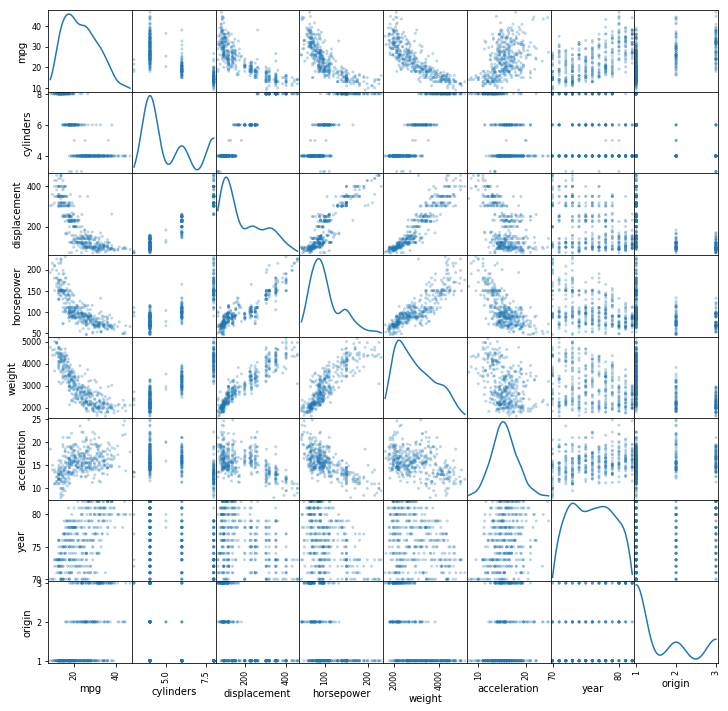

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(auto, alpha=0.3, figsize=(12, 12), diagonal='kde')
plt.show()

## c)

In [4]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


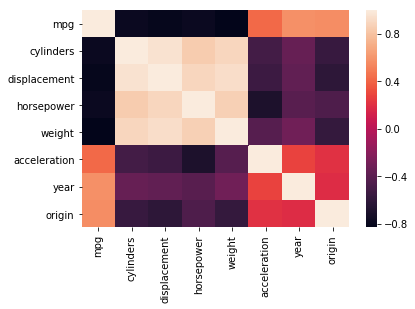

In [5]:
sb.heatmap(auto.corr())

## d)

In [6]:
import statsmodels.api as sm

Y = auto['mpg']
X= auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)

reg1 = sm.OLS(Y, X, missing = 'drop')
results1 = reg1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        14:31:01   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**i** The cofficients of displacement, weight, year and origin (**b2, b4, b6, b7**) as well as the intercept/constant (**b0**) are statistically significant at 1% level.     

**ii** The cofficients of cylinders, horsepower and acceleration (**b1, b3, b5**) are not statistically significant at 10% level.      

**iii** Miles per gallon(mpg) is expected to increase by 0.7508 when year increases by 1 (when other exogenuous variables keep stable).

## e)    

**Displacement, horsepower and weight are most likely have a nonlinear relationship with mpg.**      

**i**

In [7]:
auto['displacement_2'] = auto['displacement'] ** 2
auto['horsepower_2'] = auto['horsepower'] ** 2
auto['weight_2'] = auto['weight'] ** 2
auto['acceleration_2'] = auto['acceleration'] ** 2



X2 = auto[['cylinders', 'displacement','displacement_2', 'horsepower', 'horsepower_2', 
           'weight','weight_2', 'acceleration', 'acceleration_2', 'year', 'origin']]

X2 = sm.add_constant(X2)

reg2 = sm.OLS(Y, X2, missing = 'drop')
results2 = reg2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        14:31:01   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

**ii** The adjusted R-square here is **0.866** and in part(d) is 0.818. Therefore, it is better than that in part(d).      
**iii** The displacement variable becomes insignificant (from previous 0.008 to current 0.408) at 10% level. Its squared term is also insigificant (0.532) at 10% level.      
**iv** The cylinders variable become more insignificant than before. The p-value is from 0.128 to 0.440.

## f)

In [8]:
pr = [(1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1)]

print('The predicted miles per gallon (mpg) is', results2.predict(pr)[0])

The predicted miles per gallon (mpg) is 38.73211109687297


# Problem 2    
## a)

In [9]:
X1 = [0, 2, 0, 0, -1, 1]
X2 = [3, 0, 1, 1, 0, 1]
X3 = [0, 0, 3, 2, 1, 1]
Y = ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']

data = pd.DataFrame({'X1': X1,
                     'X2': X2,
                     'X3': X3,
                     'Y': Y})

data['dist'] = np.sqrt(data['X1']**2 + data['X2']**2 + data['X3']**2)
data

,X1,X2,X3,Y,dist
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


## b) & c)

In [10]:
data.sort_values(['dist'])

,X1,X2,X3,Y,dist
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051
1,2,0,0,Red,2.000000
3,0,1,2,Green,2.236068
0,0,3,0,Red,3.000000
2,0,1,3,Red,3.162278


When K = 1, the nearest Y is green so that the prediction is also **green**.      
When K = 3, the nearest three values of Y are green, red and red so that the prediction is **red** (its probability is 2/3).

## d)      
We would expect the best value for K to be **small**. This is because small K value means that the model is flexible and hence can fit more flexible(nonlinear) boundary. In other words, given the highly nonlinear boundary, we need a highly flexible model (small key) to reduce the bias and we also expect that the variance resulted from flexiblity to be smaller than the squared bias. On the contrary, if we use larger K value, the increase of squared bias will be relatively higher than the decrease of the variance. 

## e)

In [11]:
from sklearn import datasets, neighbors
Y = data['Y']
X = (data[['X1', 'X2', 'X3']])
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
KNN = knn.fit(X, Y)

In [12]:
print('The estimated color is', KNN.predict([(1,1,1)])[0])

The estimated color is Green


# Problem 3    
## a)

In [13]:
auto = auto.dropna()
auto['mpg_high'] = auto['mpg'].apply(lambda x: 1 if x >= auto['mpg'].median() else 0)

In [14]:
Y3 = auto['mpg_high']
X3 = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X3 = sm.add_constant(X3)
reg3 = sm.Logit(Y3, X3, missing = 'drop')
result3 = reg3.fit()

print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        14:31:02   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

The cofficients of weightand and year (**b4, b6**) as well as the intercept/constant (**b0**) are stastically significant at 5% level.    

## b)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size = 0.5, random_state=10)

In [16]:
LogReg = LogisticRegression()
results4 = LogReg.fit(X_train, y_train)

## c)

In [17]:
b0, b1, b2, b3, b4, b5, b6, b7 = results4.coef_[0].tolist()

print('b0 =',b0, 'b1 =',b1,'b2 =',b2, 'b3 =',b3,'b4 =',b4, 'b5 =',b5,'b6 =',b6, 'b7 =',b7)

b0 = -0.03223742830093547 b1 = -0.33360636758993323 b2 = 0.0004280144465372968 b3 = -0.05213026881494048 b4 = -0.004904501942759298 b5 = -0.1817553449576928 b6 = 0.30933070804859286 b7 = -0.09457774528722414


## d)

In [18]:
y_pred = LogReg.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



Since the f1-scores of predicting low mpg and high mpg are almost the same, we can infer that the model's predictive power in low and high mpg are **quite similar**. Besides, although the recall in low mpg are slightly lower than that in high mpg and the precision are slightly higher, this kind of difference might just be caused by random error because the sample size of the training set is relatively small.